# 모듈 임포팅

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

In [3]:
import time

# Keras DNN 최소 코드


# 데이터 준비

1차원 데이터 x와 x**2의 1차원 데이타 y

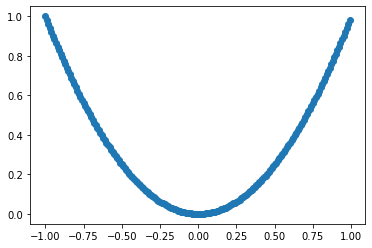

In [ ]:
import numpy as np

x = np.arange(-1,1,0.01)
y = x**2

plt.scatter(x,y)

In [ ]:
print(len(x))
print(x.shape)


200
(200,)


## 최소 코드

아래의 코드는 최소 코드.

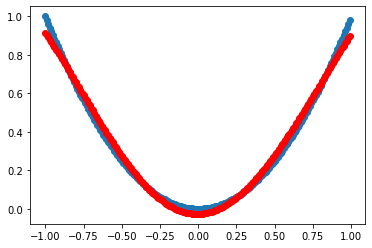

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time


# 모델 정의
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


# 컴파일 : 모델 + optimizer + loss
model.compile(optimizer="SGD", loss="mse")


# 학습
model.fit(x, y, epochs=1000, verbose=0, batch_size=20)


# 예측
y_ = model.predict(x)


# 결과 그래프로 보기
plt.scatter(x,y) # 정답
plt.scatter(x,y_,color='r') # 결과
plt.show()

# Keras DNN 최소 코드에 기본 정도만 추가

최소는 아니고, 이정도는 매번 사용하는 코드

## model.evaluate() - 성능 평가하기

7/7 [==============================] - 0s 4ms/step - loss: 0.0012 - mae: 0.0293
loss= 0.001227838103659451
mae= 0.029327386990189552


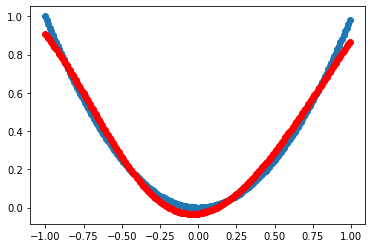

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense


model = keras.Sequential()
#model.add(Input(1))
model.add(Dense(10, activation='tanh', input_shape=(1,) ))
model.add(Dense(10, activation='tanh' ))
model.add(Dense(1))


#model.compile(optimizer="SGD", loss="mse")
model.compile(optimizer="SGD", loss="mse", metrics=["mae"])


model.fit(x, y, epochs=1000, verbose=0, batch_size=20)

loss, mae = model.evaluate(x, y) # ADD
print("loss=", loss) # ADD
print("mae=", mae) # ADD


y_ = model.predict(x)


plt.scatter(x,y)
plt.scatter(x,y_,color='r')
plt.show()

출력에 loss와 mae가 추가되었다.

## 테스트셋으로 평가하기

데이터를 train과 test으로 나누어 준비한다.

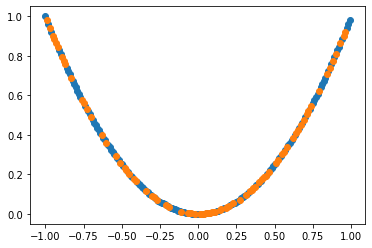

In [ ]:
x = np.arange(-1,1,0.01)
np.random.shuffle(x)
y = x**2

split_index = int(x.shape[0]*0.6)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x,train_y)
plt.scatter(test_x,test_y)
plt.show()

3/3 [==============================] - 0s 4ms/step - loss: 0.0020 - mae: 0.0370
loss= 0.0019882654305547476
mae= 0.03699081391096115


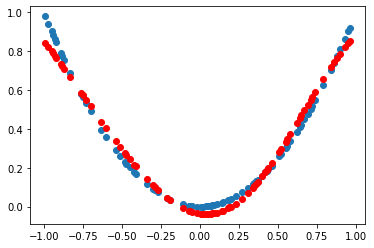

In [ ]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])


# model.fit(x, y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)


# loss, mae = model.evaluate(x, y)
loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


# y_ = model.predict(x)
y_ = model.predict(test_x)

# plt.scatter(x,y)
plt.scatter(test_x,test_y)
# plt.scatter(x,y_,color='r')
plt.scatter(test_x,y_,color='r')
plt.show()

train_x, train_y로 학습하였고,
evaluate()와 predict()에는 test_x, test_y를 사용하였다.

그려진 그림을 보면 test_x의 점사이에 빈 간격이 보인다. 그 간격이 train_x에 해당한다.

## Base Model 결과 저장

이후 비교를 위해 그래프를 저장해 둔다.


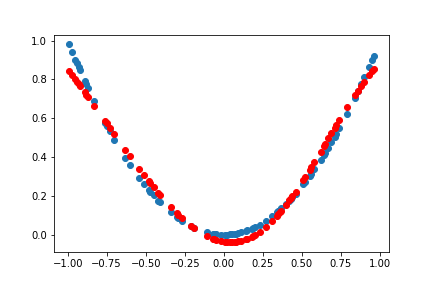

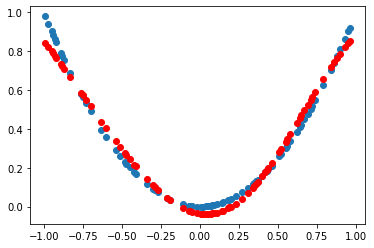

In [ ]:
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.savefig("base_result.png")

from IPython.display import Image
display(Image("base_result.png"))

## 학습 시간을 출력

elapsed : 8.563641786575317
3/3 [==============================] - 0s 4ms/step - loss: 0.0027 - mae: 0.0437
loss= 0.002715783892199397
mae= 0.043682511895895004


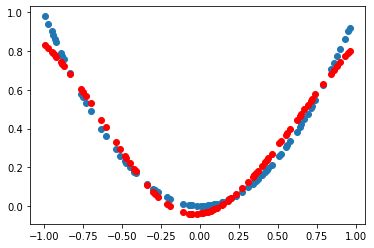

In [ ]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])

start_time = time.time() # ADD
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time)) # ADD 
    

loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

elapsed로 경과된 시간이 초 단위로 보인다.

## model.summary() 네트웤 모양 보기

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.472845315933228


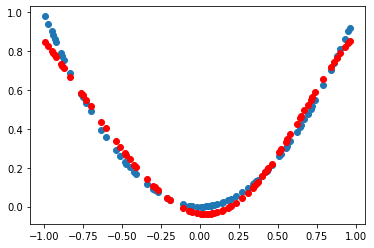

In [ ]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary() # ADD

start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

네트웤의 모양이 보인다.

노드 10개, 10개를 갖는 은닉층 2개가 있다.


모든 레이어는 activation(w\*x+b) 의 형태로, 

첫 번 째 은닉층은 20개( = ((1+1)\*10) = (입력수+1)\*10)의 웨이트를, 

두 번 째 은닉층은 110개( = ( (10+1)\*10) )의 웨이트가 있다.. 


# Keras DNN Template

본 실습에 사용되는 코든 코드의 템플릿.


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.478652954101562
3/3 [==============================] - 0s 5ms/step - loss: 0.0015 - mae: 0.0331
loss= 0.0015240181237459183
mae= 0.03305181488394737


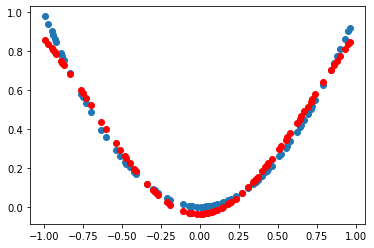

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

import time


# 모델 정의
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


# 모델 컴파일
model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


# 학습
start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))


# 평가
loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


# 예측
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

# layer 수

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import time

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

## 히든 레이어를 1개 만

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
elapsed : 8.027636528015137
3/3 [==============================] - 0s 4ms/step - loss: 0.0016 - mae: 0.0336
loss= 0.0016118375351652503
mae= 0.03361973911523819


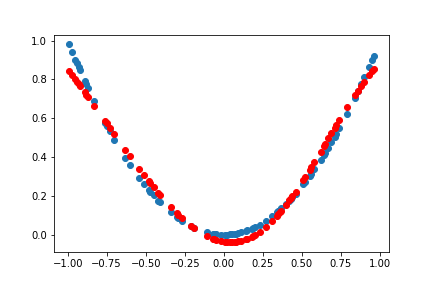

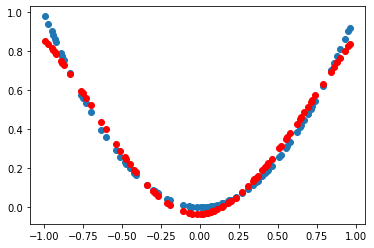

In [ ]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


# base 모델의 결과
display(Image("base_result.png")) # ADD

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## 히든레이어 없을 때

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.439738988876343
3/3 [==============================] - 0s 5ms/step - loss: 0.0971 - mae: 0.2690
loss= 0.09713579714298248
mae= 0.26896968483924866


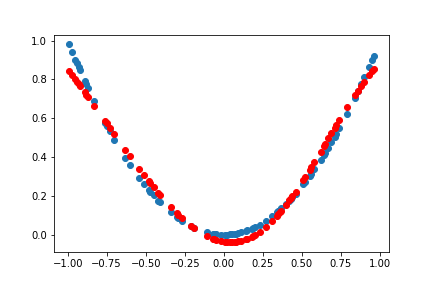

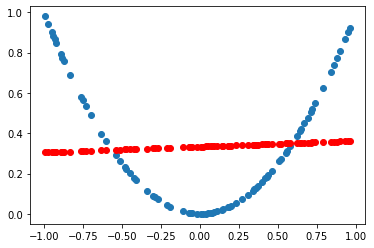

In [ ]:
from tensorflow.keras.layers import Input

model = keras.Sequential()
model.add(Input((1,)))
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


# base 모델의 결과
display(Image("base_result.png")) # ADD

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

히든 레이어가 없을 경우 학습되지 않는다.

## 히든 레이어를 3개로

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_23 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
elapsed : 8.833643436431885
3/3 [==============================] - 0s 4ms/step - loss: 0.0020 - mae: 0.0369
loss= 0.002034752396866679
mae= 0.03688105195760727


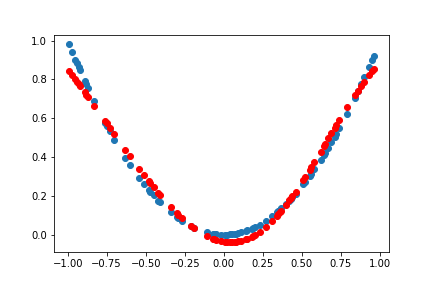

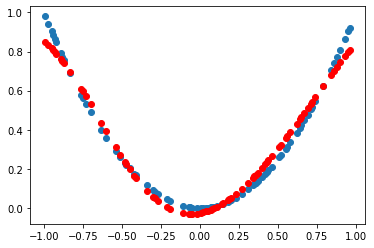

In [ ]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

3개로 증가해도 별 차이 없다.

## 히든 레이어를 5개로

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_26 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_27 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_29 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 11        
Total params: 471
Trainable params: 471
Non-trainable params: 0
________________________________________________________

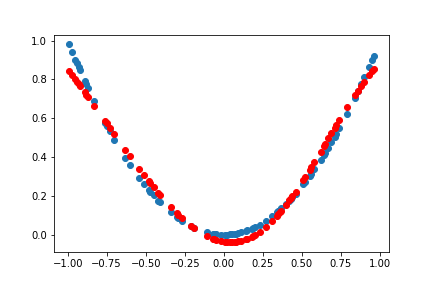

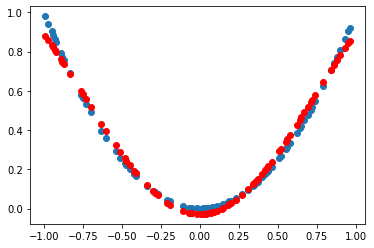

In [ ]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

5개로 증가했을 때 살짝 좋은 듯 하다.

## 히든 레이어를 10개로

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_32 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_33 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_34 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_35 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_36 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_37 (Dense)             (None, 10)              

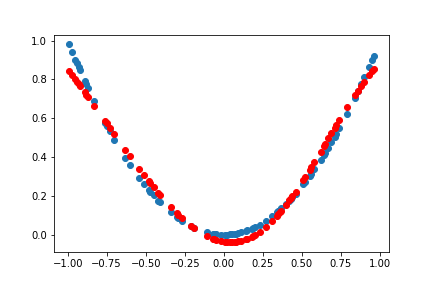

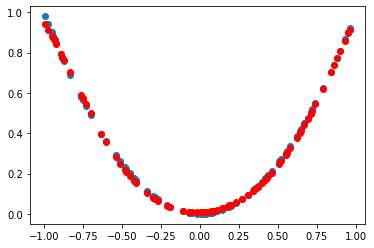

In [ ]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(10, activation='tanh')) # ADD
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

10개로 했을 때 좋아진 차이가 보인다.

# node 수

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import time

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

## node 수를 작게

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 5)                 10        
_________________________________________________________________
dense_43 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 6         
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________
elapsed : 8.592875480651855
3/3 [==============================] - 0s 4ms/step - loss: 0.0018 - mae: 0.0347
loss= 0.0017978267278522253
mae= 0.034676965326070786


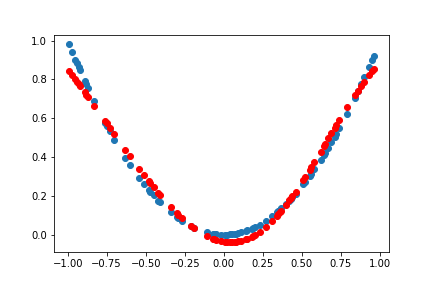

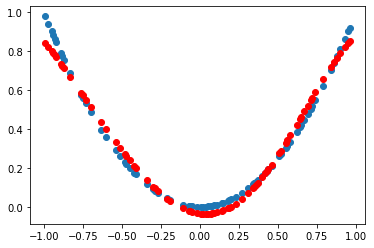

In [ ]:
model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(5, activation='tanh', input_shape=(1,)))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

5개 노드의 경우 살짝 차이가 난다.

## 노드 수를 아주 작게

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_46 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 3         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.470152378082275
3/3 [==============================] - 0s 5ms/step - loss: 0.0021 - mae: 0.0379
loss= 0.002059965394437313
mae= 0.037878163158893585


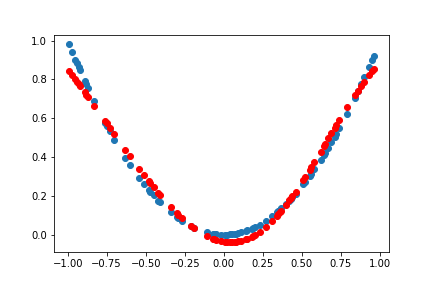

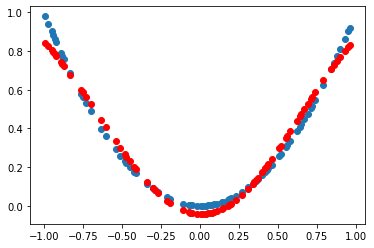

In [ ]:
model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(2, activation='tanh', input_shape=(1,)))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

2개의 경우 차이가 커 보인다.

## 노드 수가 1개

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 2         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
elapsed : 8.586721658706665
3/3 [==============================] - 0s 4ms/step - loss: 0.0968 - mae: 0.2683
loss= 0.0968322604894638
mae= 0.2683015465736389


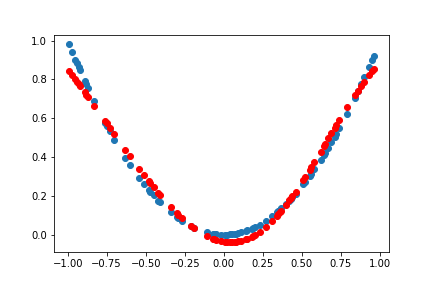

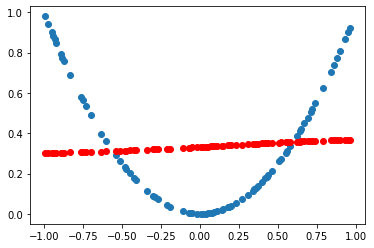

In [ ]:
model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='tanh', input_shape=(1,)))
model.add(Dense(1, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


display(Image("base_result.png"))

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

1개의 경우 거의 학습이 되지 않는다.

# sin 데이터

In [ ]:
def get_sin_data(start=0, end=10, step=0.1):
  x = np.arange(start,end,step)
  np.random.shuffle(x)
  y = np.sin(x)

  split_index = int(x.shape[0]*0.6)

  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]

  return (train_x, train_y), (test_x, test_y)

# 학습 추가 진행

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import time

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

모델은 그대로 두고 데이터만 sin 데이터로 변경한다.

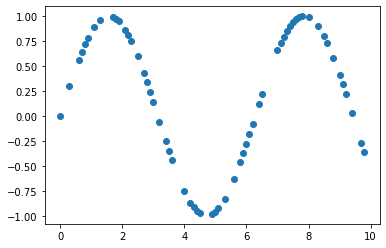

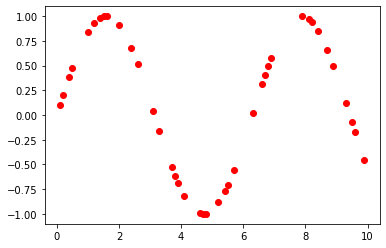

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

plt.scatter(train_x,train_y)
plt.show()

plt.scatter(test_x,test_y,color="r")
plt.show()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_52 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.48231554031372
2/2 [==============================] - 0s 6ms/step - loss: 0.1490 - mae: 0.3056
loss= 0.14901213347911835
mae= 0.3055707812309265


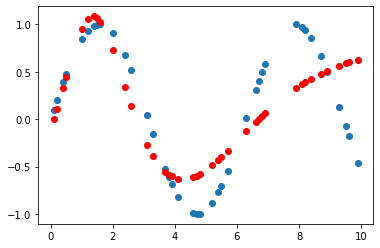

In [ ]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

학습이 충분히 되지 않은 듯 하다.

## 추가 학습

In [ ]:
def fit_one_more(model, train_x, train_y, test_x, test_y, batch_size=20):

  start_time = time.time()
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=batch_size)
  print("elapsed : {}".format(time.time() - start_time))    

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

def fit_n_times(model, train_x, train_y, test_x, test_y, n):
  
  for i in range(n):
    print("{} times fitting".format(i))
    fit_one_more(model, train_x, train_y, test_x, test_y)


0 times fitting
elapsed : 4.918807506561279


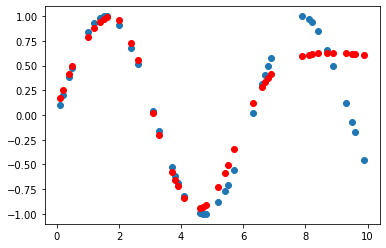

1 times fitting
elapsed : 5.144123077392578


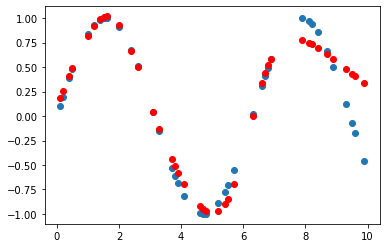

2 times fitting
elapsed : 4.8960487842559814


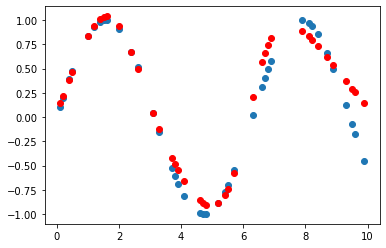

3 times fitting
elapsed : 5.142057657241821


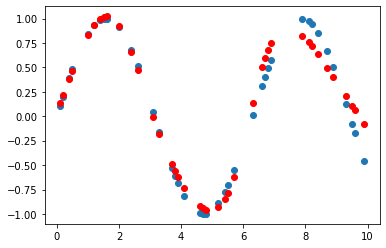

4 times fitting
elapsed : 5.139510631561279


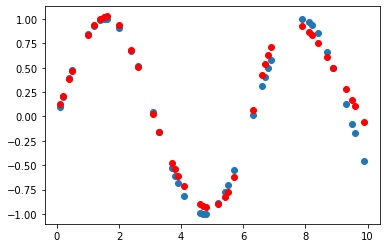

5 times fitting
elapsed : 5.1439454555511475


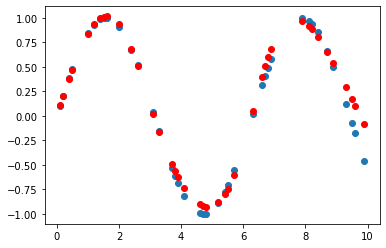

6 times fitting
elapsed : 5.1396191120147705


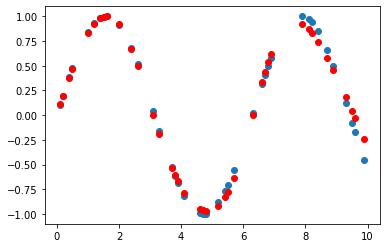

7 times fitting
elapsed : 4.919215202331543


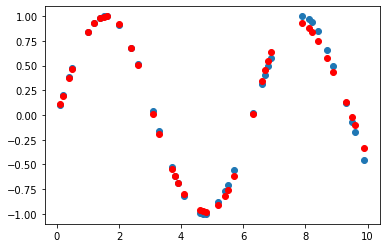

8 times fitting
elapsed : 5.145047426223755


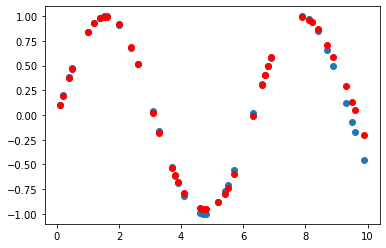

9 times fitting
elapsed : 5.145598888397217


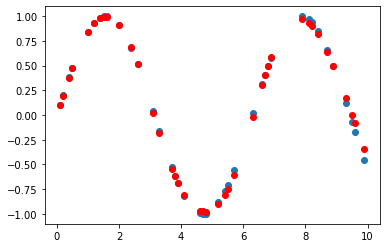

In [ ]:
fit_n_times(model, train_x, train_y, test_x, test_y, 10)

학습이 더 진행되면서 거의 완벽하게 학습된 것을 볼 수 있다.

# model.fit()의 batch_size

batch_size는 GPU와 관련된 옵션이다.

한번에 GPU에 보내는 데이터의 수이다.  

<br>

batch_size가 1일 경우 1개를 보내고, 1개의 결과를 받고, 1번 웨이트를 업데이트 한다.

batch_size가 10일 경우 10개를 보내고, 10개의 결과를 한 번에 받고, 1번 웨이트를 업데이트 한다.

<br>

GPU는 보통 수천개의 코어를 가지고 있다. 동시에 꽤 많은 연산을 처리할 수 있다. 그런데 데이터가 적으면 대부분은 사용하지 못하고 일부만 연산에 사용된다. 

복수의 데이터를 한번에 보내어 한번에 연산을 할수 있고, 그 결과를 반환할 수 있다. 이런 방법으로 연산 시간을 줄일 수 있다.

<br>

하지만, 복수의 데이터를 한번에 보내는 경우 한번에 보낸 결과가 한번에 오고 1번 업데이트 되면서 업데이트 되는 사항이 뭉개지는 단점이 있다.


In [ ]:
def build_model():

  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))

  model.compile(optimizer="SGD", loss="mse", metrics=["mae"])

  return model

def fit_with_batch_sizes(train_x, train_y, test_x, test_y, batch_sizes):

  for batch_size in batch_sizes:
    model = build_model()
    print("batch_size={}".format(batch_size))
    fit_one_more(model, train_x, train_y, test_x, test_y, batch_size)

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

## batch_size 적용 : [1,2,5,10,20,50,100,200,500]

batch_size=1
elapsed : 65.1528639793396


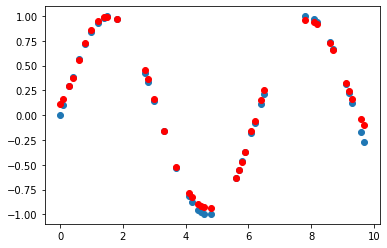

batch_size=2
elapsed : 41.199952840805054
elapsed : 41.199952840805054


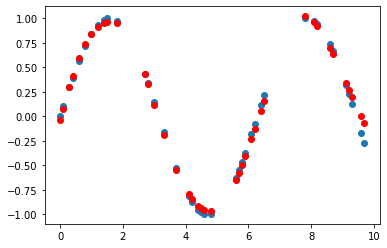

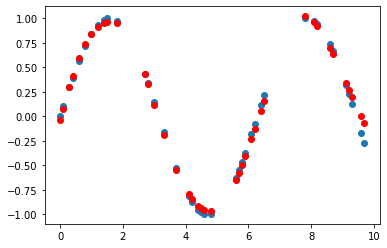

batch_size=5
batch_size=5


In [ ]:
fit_with_batch_sizes(train_x, train_y, test_x, test_y, batch_sizes=[1,2,5,10,20,50,100,200,500])

맨 앞의 결과가 batch_size 1인 경우이다. 100개의 데이터를 매번 1개 씩 보냈고, 매번 업데이트 했다. 

batch_size를 키우면, 시간은 줄어들지만 학습이 빠르게 진행되지 않는다.

# 학습 진행된 내역 보기


## model.fit()의 반환값 history

반환된 history의 loss로 진행 상황을 확인.

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_82 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 5.121232509613037


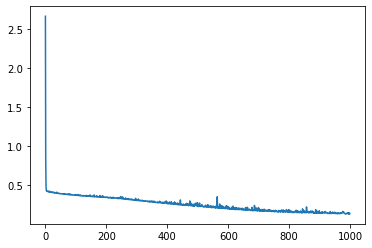

In [ ]:

plt.plot(history.history['loss'])


## model.fit() verbose

- 0 : 진행하면서 아무런 출력 없이
- 1 : 진행하면서 출력과 같이


In [ ]:
# (train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.0001)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

print(train_x.shape)

start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_85 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_86 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
(60000,)
Epoch 1/5
3000/3000 [==============================] - 5s 2ms/step - loss: 0.2721 - mae: 0.4297
Epoch 2/5
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0952 - mae: 0.2044
Epoch 3/5
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0515 - mae: 0.1478
Epoch 4/5
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0258 - mae:

# 학습 시에 validation

## model.fit()의 validation_data

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_data=(test_x, test_y))
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_112 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_113 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 18.718279600143433


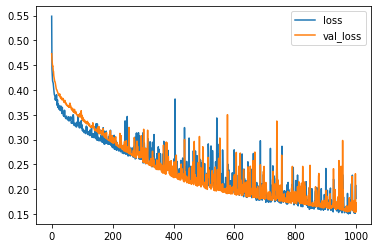

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

## model.fit()의 validation_split

따로 validation 데이터를 주지 않고, test 데이터로 준 것의 일부를 validation에 사용.

validation에 사용된 데이터는 학습에 사용되지 않는다.


In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20, validation_split=0.1)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_91 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_92 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 20.924427032470703


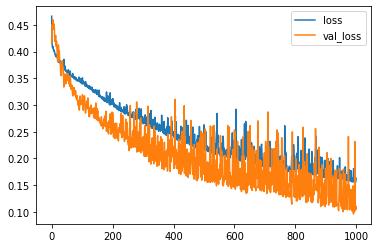

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

# 데이터 크기와 epoch 수

In [ ]:
# (train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.0001)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start_time = time.time()
# history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=5, verbose=2, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_94 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
3000/3000 - 4s - loss: 0.2443 - mae: 0.4067
Epoch 2/5
3000/3000 - 3s - loss: 0.1061 - mae: 0.2190
Epoch 3/5
3000/3000 - 3s - loss: 0.0375 - mae: 0.1135
Epoch 4/5
3000/3000 - 3s - loss: 0.0138 - mae: 0.0735
Epoch 5/5
3000/3000 - 3s - loss: 0.0095 - mae: 0.0580
elapsed : 16.48725700378418


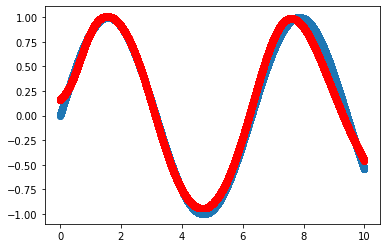

In [ ]:
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()


train_x의 데이터 수가 6000개. epoch는 5. 총 30,000번 업데이트 되었다.


epoch가 적어도 데이터 수가 많으면 학습 잘된다.

# Shuffle


## 전체 데이터 준비 시에

60


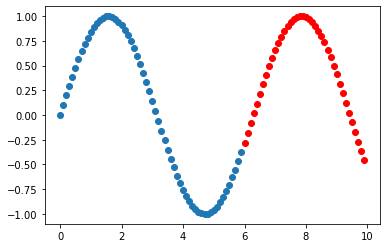

In [ ]:
x = np.arange(0,10,0.1)
# np.random.shuffle(x) # COMMENTED
y = np.sin(x)

split_index = int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_97 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_98 (Dense)             (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


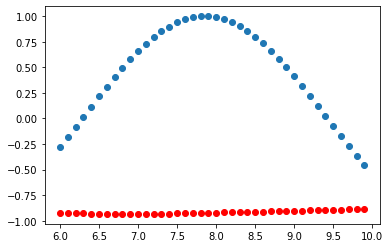

In [ ]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=2000, verbose=0, batch_size=20)

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

train 데이터와 test 데이터가 서로 떨어져 있다. 

train 영역의 데이터로 학습된 모델은 test 영역의 데이터에 적용하지 못한다.

전체데이터를 잘 섞어 주고, 이를 train, test로 나누어야 한다.

60


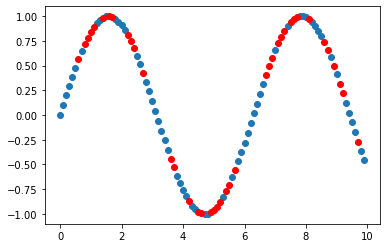

In [ ]:
x = np.arange(0,10,0.1)
np.random.shuffle(x) # UNCOMMENT
y = np.sin(x)

split_index = int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_100 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_101 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


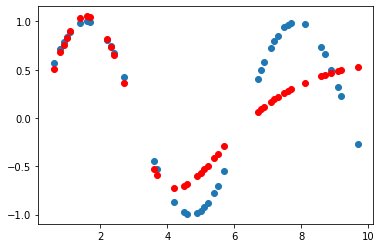

In [ ]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

history = model.fit(train_x, train_y, epochs=2000, verbose=0, batch_size=20)

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## 학습 진행 시에

학습 시에 데이터를 섞어 주지 않으면 특정 데이터 순서로 학습이 일어나 편향이 생길 수있다.

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_103 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_104 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.8169264793395996


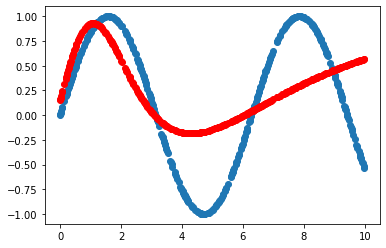

In [ ]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start_time = time.time()
history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_106 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_107 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.80784010887146


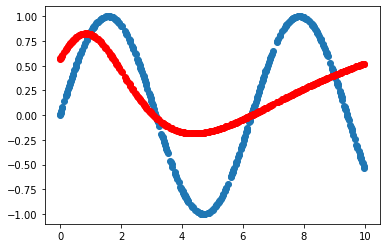

In [ ]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start_time = time.time()
# history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20, shuffle=True)
print("elapsed : {}".format(time.time() - start_time)) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

각 epoch마다 섞어 주는 거싱 중요하다.

shuffle 파라매터의 디펄트 값은 True로, Keras의 model.fit() 호출시에는 따로 설정하지 않아도 된다.

# 모델 저장과 로딩

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_109 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_110 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 5.376879692077637
2/2 [==============================] - 0s 6ms/step - loss: 0.1729 - mae: 0.3465
loss= 0.17287704348564148
mae= 0.3465226888656616


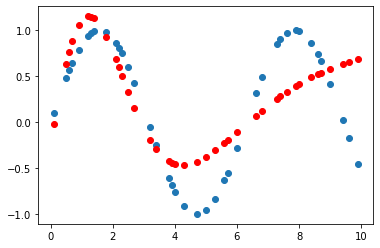

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## 모델 저장

In [ ]:
model.save('my_model.h5')

!ls -al

total 52
drwxr-xr-x 1 root root  4096 Jul 20 18:47 .
drwxr-xr-x 1 root root  4096 Jul 20 18:43 ..
-rw-r--r-- 1 root root 12529 Jul 20 18:47 base_result.png
drwxr-xr-x 4 root root  4096 Jul 16 13:19 .config
-rw-r--r-- 1 root root 19808 Jul 20 18:55 my_model.h5
drwxr-xr-x 1 root root  4096 Jul 16 13:20 sample_data


모델 로딩

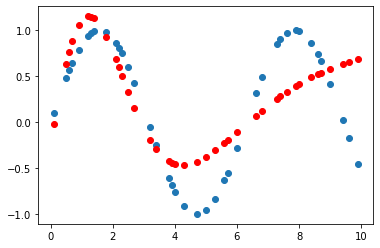

In [ ]:
new_model = keras.models.load_model('my_model.h5')

y_ = new_model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

# GPU 사용

따로 명시하지 않아도 default로 GPU를 사용한다.

명시적으로 설정할 수도 있다.

## 리스트 보기

In [ ]:
from tensorflow.python.client import device_lib
print(tf.test.gpu_device_name())

/device:GPU:0


## NVIDIA GPU 상태 보기

In [ ]:
!nvidia-smi

Tue Jul 20 18:57:45 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    31W /  70W |    382MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## GPU 설정

다음의 디바이스 이름이 가능

- /device:GPU:0
- /GPU:0
- /gpu:0
- /gpu
- /cpu:0
- /cpu

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.01)

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_115 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_116 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.1126694679260254


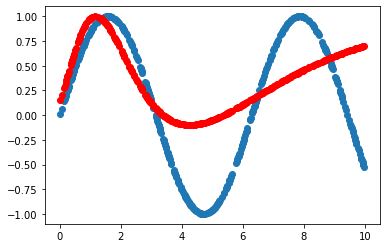

In [ ]:
with tf.device('/device:GPU:0'): # ADDED

  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
  model.summary()

  start_time = time.time()
  history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_118 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_119 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 1.5308301448822021


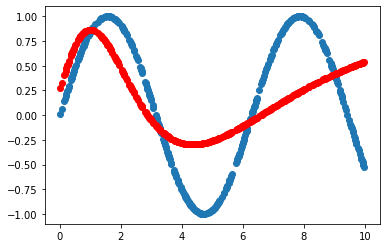

In [ ]:
# with tf.device('/GPU:0'):
with tf.device('/CPU:0'):

  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
  model.summary()

  start_time = time.time()
  history = model.fit(train_x, train_y, epochs=50, verbose=0, batch_size=20)
  print("elapsed : {}".format(time.time() - start_time)) 

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

# 웨이트 초기값

Dense() 생성시에 kernel_initializer, bias_initializer로 설정한다.

- 'he_normal'
- 'lecun_normal'

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_138 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_139 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_140 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.485719203948975
2/2 [==============================] - 0s 7ms/step - loss: 0.0953 - mae: 0.1792
loss= 0.09533381462097168
mae= 0.1792139708995819


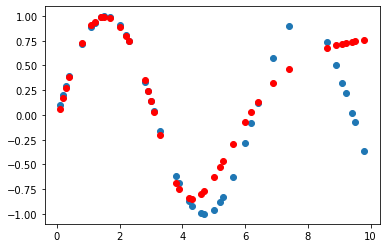

In [ ]:
(train_x, train_y), (test_x, test_y) = get_sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
# model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh', input_shape=(1,), kernel_initializer='he_normal'))
model.add(Dense(10, activation='tanh', kernel_initializer='he_normal'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

# 노이즈

In [ ]:
def train_sin_with_noise(noise_size):

  # x = np.arange(0,10,0.1)
  x = np.arange(0,10,0.001)
  np.random.shuffle(x)
  y = np.sin(x)

  noiseless_y = np.copy(y) # ADD
  y = y + np.random.rand(y.shape[0])*noise_size - noise_size/2.0 # ADD

  split_index = int(x.shape[0]*0.6)

  train_x, test_x = x[:split_index], x[split_index:]
  train_y, test_y = y[:split_index], y[split_index:]
  test_noiseless_y = noiseless_y[split_index:] # ADD

  model = keras.Sequential()
  model.add(Dense(10, activation='tanh', input_shape=(1,)))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))


  model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
  model.summary()


  start_time = time.time()
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=100)
  print("elapsed : {}".format(time.time() - start_time))    


  loss, mae = model.evaluate(test_x, test_y)
  print("loss=", loss)
  print("mae=", mae)


  y_ = model.predict(test_x)

  # plt.scatter(test_x,test_y)
  plt.scatter(test_x,test_y, s=1)
  plt.scatter(test_x,y_, s=1)
  plt.show()

## 노이즈 없을 때

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_141 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_142 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_143 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 70.38758420944214
125/125 [==============================] - 0s 1ms/step - loss: 1.8737e-04 - mae: 0.0119
loss= 0.00018736920901574194
mae= 0.01187607180327177


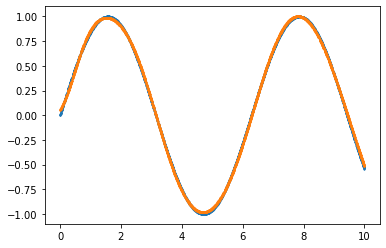

In [ ]:
train_sin_with_noise(0.0)

## 노이즈 크기 0.1

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_144 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_145 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_146 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 70.39146661758423
125/125 [==============================] - 0s 2ms/step - loss: 9.0329e-04 - mae: 0.0256
loss= 0.0009032884263433516
mae= 0.025622116401791573


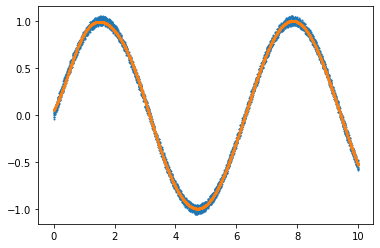

In [ ]:
train_sin_with_noise(0.1)

## 노이즈 크기 0.5

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_147 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_148 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_149 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 82.17430400848389
125/125 [==============================] - 0s 1ms/step - loss: 0.0240 - mae: 0.1321
loss= 0.024018926545977592
mae= 0.13210710883140564


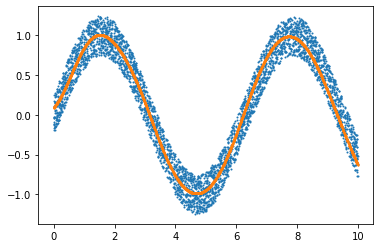

In [ ]:
train_sin_with_noise(0.5)

## 노이즈 크기 1.0

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_151 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_152 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 70.225102186203
125/125 [==============================] - 0s 2ms/step - loss: 0.0857 - mae: 0.2541
loss= 0.08565735816955566
mae= 0.25407543778419495


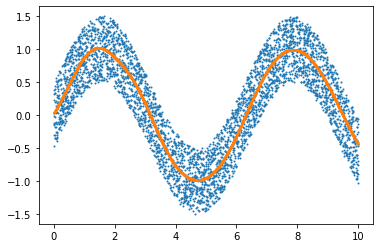

In [ ]:
train_sin_with_noise(1.0)

## 노이즈 크기 10.0

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_153 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_154 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_155 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 70.8134491443634
125/125 [==============================] - 0s 1ms/step - loss: 8.3756 - mae: 2.4938
loss= 8.37563705444336
mae= 2.4938275814056396


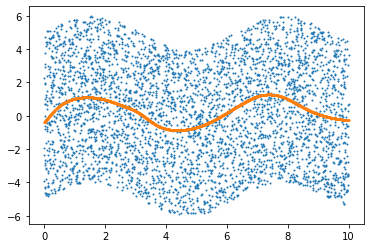

In [ ]:
train_sin_with_noise(10.0)

## 노이즈 피쳐
노이즈 입력을 하나 더 준다.

In [ ]:
x = np.arange(0,10,1.0)
np.random.shuffle(x)

y = np.zeros((x.shape[0],2))
y[:,0] = np.sin(x)
y[:,1] = np.random.rand(x.shape[0])


Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_156 (Dense)            (None, 10)                30        
_________________________________________________________________
dense_157 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_158 (Dense)            (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
300/300 [==============================] - 1s 2ms/step - loss: 0.4079 - mae: 0.5593
Epoch 2/100
300/300 [==============================] - 1s 2ms/step - loss: 0.3533 - mae: 0.5238
Epoch 3/100
300/300 [==============================] - 1s 2ms/step - loss: 0.3212 - mae: 0.4985
Epoch 4/100
300/300 [==============================] - 1s 2ms/step - loss: 0.2861 - mae: 0.4670
E

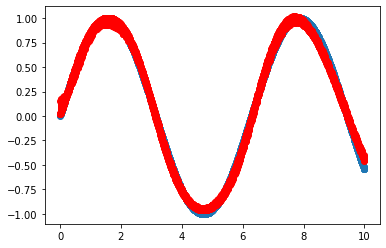

In [ ]:
# x = np.arange(0,10,0.001)
x = np.zeros((10000,2))
x[:,0] = np.arange(0,10,0.001) # ADD
x[:,1] = np.random.rand(x.shape[0]) # ADD
np.random.shuffle(x)

# y = np.sin(x)
y = np.sin(x[:,0])

split_index = int(x.shape[0]*0.6)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh', input_shape=(2,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=100, verbose=1, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


y_ = model.predict(test_x)

plt.scatter(test_x[:,0],test_y)
plt.scatter(test_x[:,0],y_,color='r')
plt.show()

# 학습 되지 않는 랜덤 함수

랜덤 한수의 경우 x와 y의 간에 관계가 없다.

입출력 간에 관계가 없는 함수로 학습되지 않는다.

60


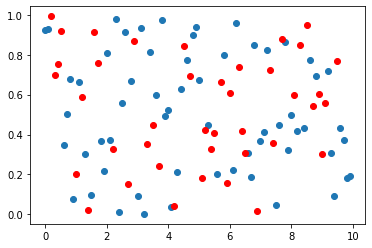

In [ ]:
x = np.arange(0,10,0.1)
np.random.shuffle(x)
# y = np.sin(x)
y = np.random.random_sample(x.shape[0])

split_index = int(x.shape[0]*0.6)
print(split_index)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]


plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y, color="r")

# Optimizer

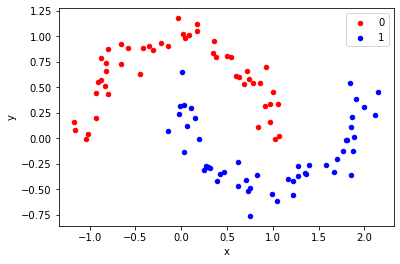

In [4]:
from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from pandas import DataFrame
import matplotlib.pyplot as plt

x, y = make_moons(n_samples=100, noise=0.1, random_state=1)

df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

split_index = int(len(x)*0.7)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]


## SGD

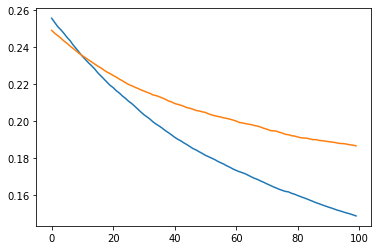

In [6]:
optimizer = "SGD"


model = Sequential()
model.add(Dense(500, activation="relu", input_shape=(2,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

history = model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show() 

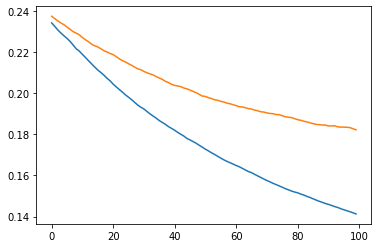

In [7]:
from tensorflow.keras.optimizers import SGD

optimizer = SGD(learning_rate=0.01)


model = Sequential()
model.add(Dense(500, activation="relu", input_shape=(2,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

history = model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show() 

## Adam

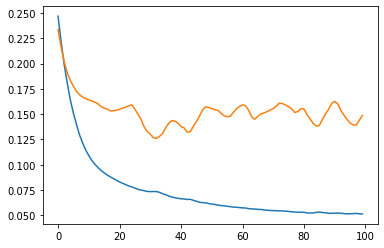

In [8]:
optimizer = "Adam"



model = Sequential()
model.add(Dense(500, activation="relu", input_shape=(2,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

history = model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show() 

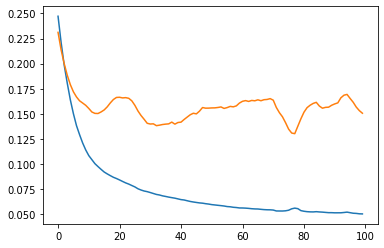

In [9]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)



model = Sequential()
model.add(Dense(500, activation="relu", input_shape=(2,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

history = model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show() 

## Adagrad

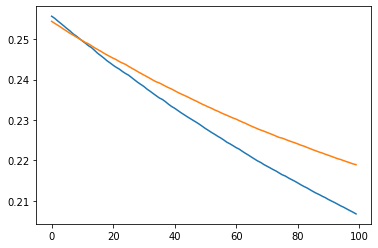

In [10]:
optimizer = "Adagrad"



model = Sequential()
model.add(Dense(500, activation="relu", input_shape=(2,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

history = model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show() 

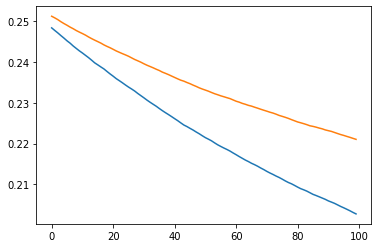

In [11]:
from tensorflow.keras.optimizers import Adagrad

optimizer = Adagrad(learning_rate=0.001)



model = Sequential()
model.add(Dense(500, activation="relu", input_shape=(2,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

history = model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show() 

## RMSprop

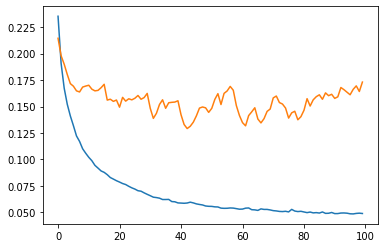

In [12]:
optimizer = "RMSprop"



model = Sequential()
model.add(Dense(500, activation="relu", input_shape=(2,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

history = model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show() 

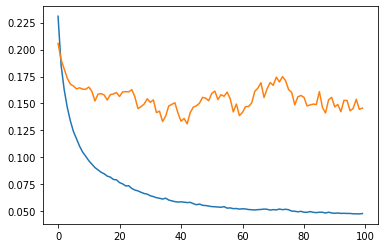

In [13]:
from tensorflow.keras.optimizers import RMSprop

optimizer = RMSprop(learning_rate=0.001)



model = Sequential()
model.add(Dense(500, activation="relu", input_shape=(2,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

history = model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show() 

# 다양한 입출력

## 2개의 입력, 1개의 출력

x1 + x2 -> y의 함수를 학습

x1과 x2는 0~1의 범위를 갖는다.


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_17 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
elapsed : 41.19204640388489
2/2 [==============================] - 0s 7ms/step - loss: 2.2011e-04 - mae: 0.0127
loss= 0.00022011125111021101
mae= 0.012722602114081383


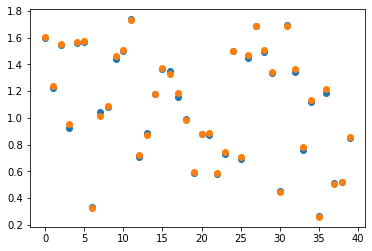

In [14]:
x = np.ones((100,2))
x[:,0] = np.random.rand(100)
x[:,1] = np.random.rand(100)
y = np.sum(x, axis=1)


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]


model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh', input_shape=(2,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000*5, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)
              
y_ = model.predict(test_x)

plt.plot(test_y, 'o')
plt.plot(y_, 'o')
plt.show()

## 1개의 입력, 2개의 출력

다음과 같이 y는 2개의 값을 갖고, y1 = x*2, y2=x/2인 함수를 학습

```
y1 = x*2.0
y2 = x/2.0
```


Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_192 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_193 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_194 (Dense)            (None, 2)                 22        
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________
elapsed : 5.536524295806885
2/2 [==============================] - 0s 7ms/step - loss: 7.9454e-04 - mae: 0.0215
loss= 0.0007945395773276687
mae= 0.02145434357225895


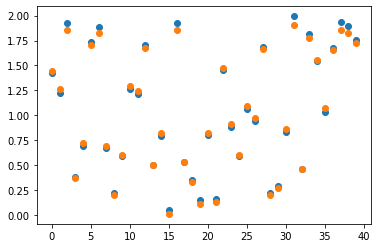

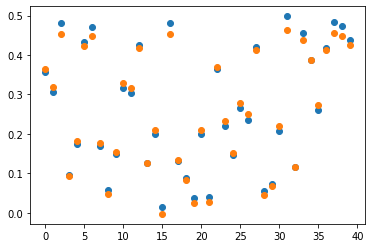

In [ ]:
x = np.random.rand(100)
y = np.zeros((100,2))
y[:,0] = x*2.0
y[:,1] = x/2.0


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]


from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
# model.add(Dense(1))
model.add(Dense(2))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)
              
y_ = model.predict(test_x)

plt.plot(test_y[:,0], 'o')
plt.plot(y_[:,0], 'o')
plt.show()

plt.plot(test_y[:,1], 'o')
plt.plot(y_[:,1], 'o')
plt.show()


## 2개의 입력, 2개의 출력

x1 + x2 -> z, 

y1 = z*2, y2=z/2인 함수를 학습

x1과 x2는 0~1의 범위를 갖는다.

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_195 (Dense)            (None, 10)                30        
_________________________________________________________________
dense_196 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_197 (Dense)            (None, 2)                 22        
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________
elapsed : 5.472299575805664
2/2 [==============================] - 0s 7ms/step - loss: 0.0037 - mae: 0.0389
loss= 0.0036618472076952457
mae= 0.038915060460567474


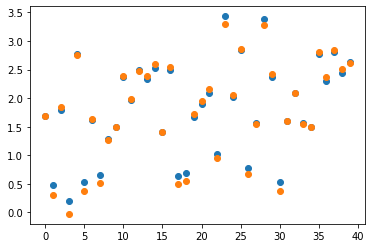

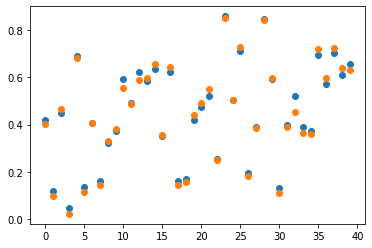

In [ ]:
x = np.ones((100,2))
x[:,0] = np.random.rand(100)
x[:,1] = np.random.rand(100)

z = np.sum(x, axis=1)

y = np.zeros((100,2))
y[:,0] = z*2.0
y[:,1] = z/2.0


s = int(x.shape[0]*0.6)
train_x, test_x = x[:s], x[s:]
train_y, test_y = y[:s], y[s:]


from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
# model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh', input_shape=(2,)))
model.add(Dense(10, activation='tanh'))
# model.add(Dense(1))
model.add(Dense(2))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed :", (time.time() - start))

loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)
              
y_ = model.predict(test_x)

plt.plot(test_y[:,0], 'o')
plt.plot(y_[:,0], 'o')
plt.show()

plt.plot(test_y[:,1], 'o')
plt.plot(y_[:,1], 'o')
plt.show()



# CallBack

학습 도중 로그 출력이나 모델저장 등 다양한 액션을 취할 수 있다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import Callback

import time

In [15]:
x = np.arange(-1,1,0.01)
np.random.shuffle(x)
y = x**2

split_index = int(x.shape[0]*0.6)

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

## 로스 출력

In [16]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):

    self.i = 0
    self.x = []
    self.losses = []
    self.val_losses = []

    self.fig = plt.figure()

    self.logs = []


  def on_epoch_end(self, epoch, logs={}):

    self.logs.append(logs)
    self.x.append(self.i)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))
    self.i += 1

    clear_output(wait=True)
    plt.plot(self.x, self.losses, label="loss")
    plt.plot(self.x, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])



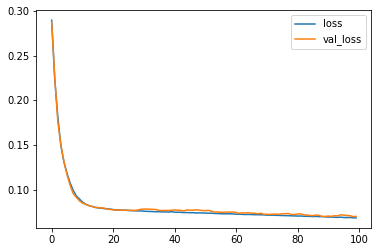

loss =  0.06843207776546478 , val_loss =  0.07013335824012756
elapsed : 20.766448497772217


In [ ]:
model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

plot_losses = PlotLosses() # ADDED

# model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)
model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1, callbacks=[plot_losses])

## 모델 저장

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

train_with_callbacks([model_check_point])

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_159 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_160 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_161 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 3.451777458190918


## early stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',  # 모니터링 대상
                               mode='auto',         # 학습 방향을 자동으로 탐지
                               patience=50)         # 중지까지의 여유분

model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

# model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)
model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1, callbacks=[early_stopping])


Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_165 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_166 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_167 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.965176820755005


## 학습율 조정

학습 과정을 모니터링 하면서 진척되지 않으면 학습율을 조정한다.

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', # 모니터링 대상
                              factor=0.2,         # 줄이는 양
                              patience=5,         # 대상 기간동안 유지
                              min_lr=0.001)       # 최소 학습율


model = keras.Sequential()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

# model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1)
model.fit(train_x, train_y, epochs=100, verbose=0, batch_size=20, validation_split=0.1, callbacks=[reduce_lr])


Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_168 (Dense)            (None, 10)                20        
_________________________________________________________________
dense_169 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_170 (Dense)            (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 2.952620506286621


## 모두 한번에

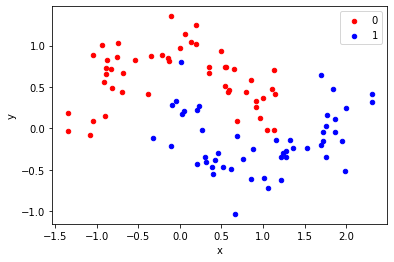

In [ ]:
from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from matplotlib import pyplot
from pandas import DataFrame

x, y = make_moons(n_samples=100, noise=0.2, random_state=1)

df = DataFrame(dict(x=x[:,0], y=x[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

split_index = 30
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]


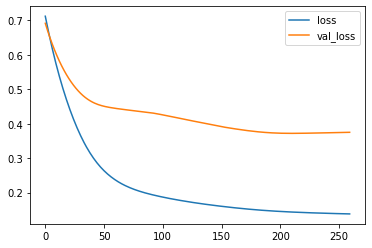

loss =  0.13826070725917816 , val_loss =  0.3752059042453766
Epoch 00260: early stopping


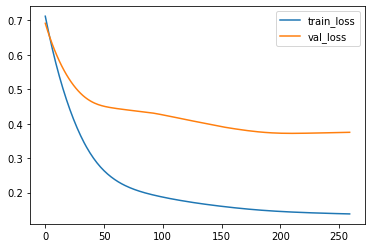

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

model = Sequential()
model.add(Dense(500, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
plot_losses = PlotLosses()
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

callbacks = [model_check_point, plot_losses, early_stopping, reduce_lr]


# history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=500, verbose=0)
history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=500, verbose=0, callbacks=callbacks)


plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

